In [2]:
from google.colab import files
files.upload()

Saving chicago_crime_clean_day1.csv to chicago_crime_clean_day1.csv


{'chicago_crime_clean_day1.csv': b'Date,Year,Primary Type,Description,Location Description,District,Community Area,Latitude,Longitude,Arrest\r\n05-03-2016 22:00,2016,THEFT,$500 AND UNDER,RESIDENCE,15,25,41.88629724,-87.76175071,FALSE\r\n05-03-2016 17:30,2016,THEFT,FROM BUILDING,OTHER,12,28,41.87781186,-87.65575801,FALSE\r\n05-03-2016 09:00,2016,THEFT,$500 AND UNDER,STREET,1,35,41.84301696,-87.61722727,FALSE\r\n05-03-2016 22:08,2016,THEFT,OVER $500,STREET,14,24,41.91090083,-87.68601875,FALSE\r\n05-03-2016 21:45,2016,THEFT,OVER $500,STREET,14,24,41.9082371,-87.67843742,FALSE\r\n05-03-2016 18:30,2016,THEFT,OVER $500,RESIDENCE-GARAGE,19,7,41.92732184,-87.66581042,FALSE\r\n05-03-2016 21:00,2016,THEFT,$500 AND UNDER,STREET,16,10,41.99596152,-87.79752856,FALSE\r\n05-03-2016 07:00,2016,THEFT,$500 AND UNDER,VEHICLE-COMMERCIAL,22,73,41.7213798,-87.64978116,FALSE\r\n05-03-2016 20:30,2016,THEFT,$500 AND UNDER,PARKING LOT/GARAGE(NON.RESID.),19,7,41.92527818,-87.65936796,FALSE\r\n05-03-2016 19:30,20

In [3]:
import pandas as pd
df=pd.read_csv("chicago_crime_clean_day1.csv")
df.head()

,Date,Year,Primary Type,Description,Location Description,District,Community Area,Latitude,Longitude,Arrest
0,05-03-2016 22:00,2016,THEFT,$500 AND UNDER,RESIDENCE,15,25,41.886297,-87.761751,False
1,05-03-2016 17:30,2016,THEFT,FROM BUILDING,OTHER,12,28,41.877812,-87.655758,False
2,05-03-2016 09:00,2016,THEFT,$500 AND UNDER,STREET,1,35,41.843017,-87.617227,False
3,05-03-2016 22:08,2016,THEFT,OVER $500,STREET,14,24,41.910901,-87.686019,False
4,05-03-2016 21:45,2016,THEFT,OVER $500,STREET,14,24,41.908237,-87.678437,False


# Basic Dataset Check

In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  8000 non-null   object 
 1   Year                  8000 non-null   int64  
 2   Primary Type          8000 non-null   object 
 3   Description           8000 non-null   object 
 4   Location Description  8000 non-null   object 
 5   District              8000 non-null   int64  
 6   Community Area        8000 non-null   int64  
 7   Latitude              8000 non-null   float64
 8   Longitude             8000 non-null   float64
 9   Arrest                8000 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 570.4+ KB


# Handle Missing values

In [5]:
df.isnull().sum()

,0
Date,0
Year,0
Primary Type,0
Description,0
Location Description,0
District,0
Community Area,0
Latitude,0
Longitude,0
Arrest,0


In [6]:
df=df.dropna()

# Convert Date Column

In [8]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

In [9]:
df["Date"].head()

,Date
0,2016-05-03 22:00:00
1,2016-05-03 17:30:00
2,2016-05-03 09:00:00
3,2016-05-03 22:08:00
4,2016-05-03 21:45:00


In [10]:
df = df.dropna(subset=["Date"])

# Extract Month and Hour

In [11]:
df["Month"] = df["Date"].dt.month
df["Hour"] = df["Date"].dt.hour
df[["Month", "Hour"]].describe()

,Month,Hour
count,3964.000000,3964.000000
mean,4.183401,13.312059
std,2.269262,6.877593
min,1.000000,0.000000
25%,2.000000,9.000000
50%,5.000000,15.000000
75%,5.000000,19.000000
max,12.000000,23.000000


In [12]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df = df.dropna(subset=["Date"])
df["Hour"] = df["Date"].dt.hour

In [13]:
df.to_csv("chicago_crime_clean_day2.csv", index=False)

In [14]:
import os
os.listdir()

['.config',
 'chicago_crime_clean_day2.csv',
 'chicago_crime_clean_day1.csv',
 'sample_data']

In [15]:
import pandas as pd
df = pd.read_csv("chicago_crime_clean_day2.csv")

In [16]:
df.head()

,Date,Year,Primary Type,Description,Location Description,District,Community Area,Latitude,Longitude,Arrest,Month,Hour
0,2016-05-03 22:00:00,2016,THEFT,$500 AND UNDER,RESIDENCE,15,25,41.886297,-87.761751,False,5,22
1,2016-05-03 17:30:00,2016,THEFT,FROM BUILDING,OTHER,12,28,41.877812,-87.655758,False,5,17
2,2016-05-03 09:00:00,2016,THEFT,$500 AND UNDER,STREET,1,35,41.843017,-87.617227,False,5,9
3,2016-05-03 22:08:00,2016,THEFT,OVER $500,STREET,14,24,41.910901,-87.686019,False,5,22
4,2016-05-03 21:45:00,2016,THEFT,OVER $500,STREET,14,24,41.908237,-87.678437,False,5,21


In [17]:
df.shape

(3964, 12)

In [18]:
df.columns

Index(['Date', 'Year', 'Primary Type', 'Description', 'Location Description',
       'District', 'Community Area', 'Latitude', 'Longitude', 'Arrest',
       'Month', 'Hour'],
      dtype='object')

In [19]:
df.dtypes

,0
Date,object
Year,int64
Primary Type,object
Description,object
Location Description,object
District,int64
Community Area,int64
Latitude,float64
Longitude,float64
Arrest,bool


# Crimes By Hour

In [20]:
crime_by_hour = df["Hour"].value_counts().sort_index()
crime_by_hour

,count
Hour,
0,265
1,124
2,99
3,75
4,59
5,50
6,67
7,86
8,137


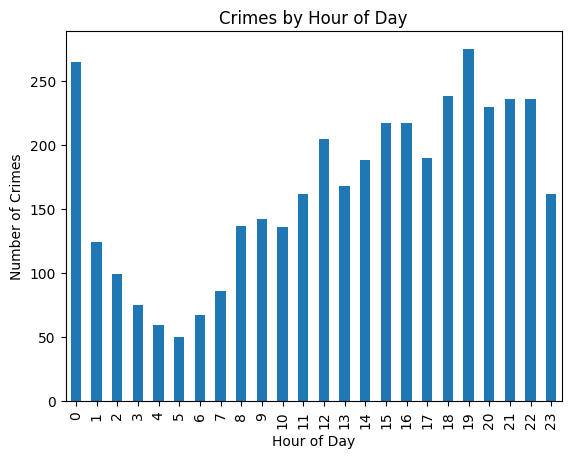

In [21]:
import matplotlib.pyplot as plt
crime_by_hour.plot(kind="bar")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crimes")
plt.title("Crimes by Hour of Day")
plt.show()

# Crimes By Month

In [22]:
crime_by_month = df["Month"].value_counts().sort_index()
crime_by_month

,count
Month,
1,620
2,472
3,317
4,326
5,1777
6,69
7,78
8,79
9,86


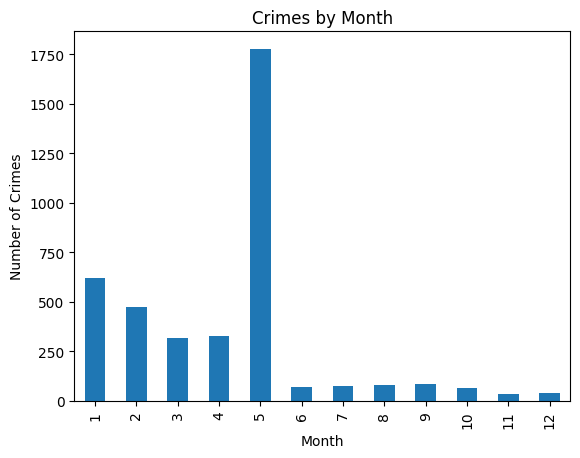

In [23]:
crime_by_month.plot(kind="bar")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.title("Crimes by Month")
plt.show()

# Geographic Crime Patterns

In [24]:
df[["Latitude", "Longitude"]].describe()

,Latitude,Longitude
count,3964.000000,3964.000000
mean,41.844598,-87.669064
std,0.084785,0.057757
min,41.650546,-87.925509
25%,41.771442,-87.708644
50%,41.861606,-87.663041
75%,41.906951,-87.627920
max,42.022535,-87.532865


In [25]:
df_geo = df.dropna(subset=["Latitude", "Longitude"])

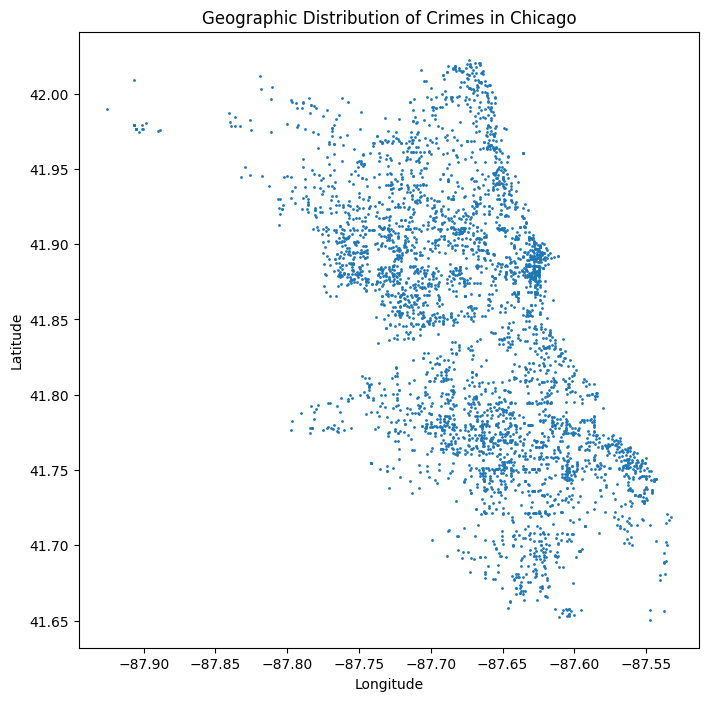

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(df_geo["Longitude"], df_geo["Latitude"], s=1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Crimes in Chicago")
plt.show()

In [27]:
!pip install folium

In [28]:
import folium
from folium.plugins import HeatMap
m = folium.Map(location=[41.85, -87.65], zoom_start=10)
heat_data = df_geo[["Latitude", "Longitude"]].values.tolist()
HeatMap(heat_data, radius=8).add_to(m)
m